
#Описание работы:
# Подготовка исследование для компании «Мегафон». Нужно было провести анализ зависит (и зависит ли) оценка, которую ставит клиент в опросе, от технических показателей, которые были собраны. 

#Ссылка на данные: https://disk.yandex.ru/d/K4yxfF64QcylAw

---------------------------------------------------------------------------------------------------------------------------------------------
# Предоставленные данные
---------------------------------------------------------------------------------------------------------------------------------------------

In [2]:
import pandas as pd 
import numpy as np
data = pd.read_csv('megafon.csv')
data = data.fillna('0')
title = ['Total Traffic(MB)', 'Downlink Throughput(Kbps)','Uplink Throughput(Kbps)', 'Downlink TCP Retransmission Rate(%)','Video Streaming Download Throughput(Kbps)','Video Streaming xKB Start Delay(ms)','Web Page Download Throughput(Kbps)', 'Web Average TCP RTT(ms)']
data['count'] = 1
data

,user_id,Q1,Q2,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms),count
0,1,5,0,775.48846,360.13,86.56,3.93,1859.15,2309,1007.82,83,1
1,2,5,4,861.96324,3023.54,411.18,1.27,667.47,2080,255.36,425,1
2,3,1,4,261.11860,790.96,34.20,1.79,1079.60,6367,535.85,485,1
3,4,8,3,179.18564,2590.97,325.88,0.80,7053.81,3218,1221.02,51,1
4,5,2,"2, 3, 4",351.99208,731.61,223.54,1.15,4550.38,1767,2336.56,68,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3107,3108,3,"1, 4, 5",519.96475,1045.70,44.61,0.47,4523.66,1468,1044.66,304,1
3108,3109,3,"1, 3, 4, 5",171.52629,670.32,40.94,2.35,1711.54,2780,954.91,251,1
3109,3110,10,0,187.44936,590.29,186.36,2.06,3182.83,2195,1094.62,109,1
3110,3111,6,"1, 3",827.74515,1841.90,373.53,1.21,5675.93,1905,2361.88,202,1


---------------------------------------------------------------------------------------------------------------------------------------------
# Анализ данных
---------------------------------------------------------------------------------------------------------------------------------------------


# Круговая диаграмма с удлетворенностью качествв связи клиентов "Мегафон"

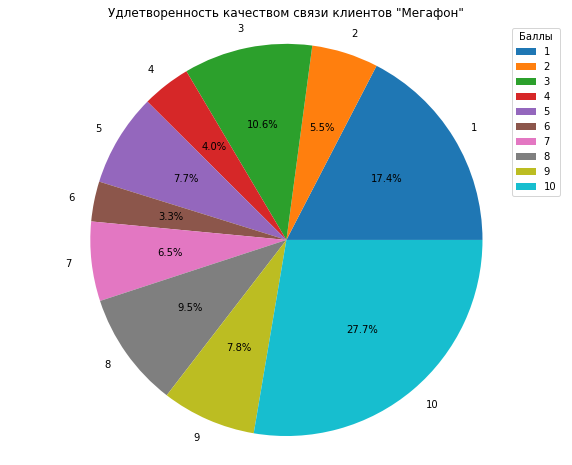

In [3]:
import matplotlib.pyplot as plt
data_4 = data.groupby('Q1').sum()
data_4 = data_4[data_4['count'] > 12]['count'].reset_index()
data_4['Q1'] = data_4['Q1'].map(lambda x: int(x))
data_4 = data_4.sort_values('Q1')
fig1, ax1 = plt.subplots(figsize=(10,8))
ax1.pie(data_4['count'], labels=data_4['Q1'],autopct='%1.1f%%')
ax1.axis('equal')  
plt.title('Удлетворенность качеством связи клиентов "Мегафон"')
plt.legend(title = 'Баллы',loc='upper right')
plt.show()

# Круговая диаграмма с основными проблемами с которыми сталкиваються клиенты "Мегафон"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


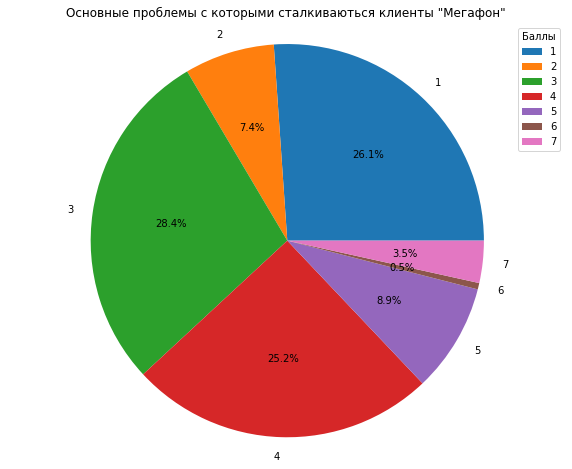

In [4]:
data_4 = data[['Q2','count']]
data_4['Q2'] = data_4['Q2'].map(lambda x: x.split(','))
data_4 = data_4.explode('Q2')[data['Q2'] != '0'].groupby('Q2').sum().reset_index()
def f(x):
  while ' ' in x:
    x = x.replace(' ','')
  if '0' in x and len(x)>1:
     x = x.replace('0','')
  if len(x)>1:
    return '0'
  return x
data_4['Q2'] = data_4['Q2'].map(lambda x: f(x))
data_4 = data_4[data_4['Q2'] != '0'].groupby('Q2').sum().reset_index()
fig1, ax1 = plt.subplots(figsize=(10,8))
ax1.pie(data_4['count'], labels=data_4['Q2'],autopct='%1.1f%%')
ax1.axis('equal')  
plt.title('Основные проблемы с которыми сталкиваються клиенты "Мегафон"')
plt.legend(title = 'Баллы',loc='upper right')
plt.show()

# Отклонение от нормы показателей связи у клиентов, которые поставили плохую оценку

In [5]:
data_3 = pd.DataFrame({'title':title})
l = {'title':['1','2','3','4','5','6','7']}
def f(x,n):
  n = str(n)
  if n in x:
    return n
  else:
    return '0'
def f1(x,data_1,data_2):
  n1 = data_1[x].mean()
  n2 = data_2[x].mean()
  n = round(n1/n2*100-100,2)
  print(x+':', n,'%')
  return n
def g(y):
  data_1 = data.copy()
  data_1['Q2'] = data_1['Q2'].map(lambda x: f(x,y))
  data_2 = data_1[data_1['Q2']=='0']
  data_1 = data_1[data_1['Q2']==str(y)]
  print('У клиентов чья жалоба была под номером',y,'следующие показтели отличаються по сравнению с другими пользователими на:')
  for i in title:
    s = f1(i,data_1,data_2)
    if i not in l:
      l[i] = [s]
    else:
      l[i] = l[i] +[s]
  print()
for i in range(1,8):
  g(i)

У клиентов чья жалоба была под номером 1 следующие показтели отличаються по сравнению с другими пользователими на:
Total Traffic(MB): -1.87 %
Downlink Throughput(Kbps): -4.58 %
Uplink Throughput(Kbps): -2.75 %
Downlink TCP Retransmission Rate(%): 7.07 %
Video Streaming Download Throughput(Kbps): -0.29 %
Video Streaming xKB Start Delay(ms): 13.77 %
Web Page Download Throughput(Kbps): 3.23 %
Web Average TCP RTT(ms): 6.31 %

У клиентов чья жалоба была под номером 2 следующие показтели отличаються по сравнению с другими пользователими на:
Total Traffic(MB): -3.92 %
Downlink Throughput(Kbps): -14.98 %
Uplink Throughput(Kbps): -5.23 %
Downlink TCP Retransmission Rate(%): 15.2 %
Video Streaming Download Throughput(Kbps): -2.49 %
Video Streaming xKB Start Delay(ms): 2.61 %
Web Page Download Throughput(Kbps): -12.99 %
Web Average TCP RTT(ms): 20.19 %

У клиентов чья жалоба была под номером 3 следующие показтели отличаються по сравнению с другими пользователими на:
Total Traffic(MB): -0.59 %
Dow

# Таблица с отклонениями от нормы показателей связи у клиентов, которые поставили плохую оценку

In [6]:
l['mean'] = [sum([l[i][0] for i in title])/8,sum([l[i][1] for i in title])/8,sum([l[i][2] for i in title])/8,sum([l[i][3] for i in title])/8,sum([l[i][4] for i in title])/8,sum([l[i][5] for i in title])/8,sum([l[i][6] for i in title])/8]
data_3 = pd.DataFrame(l)
title +=['mean']
data_3

,title,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms),mean
0,1,-1.87,-4.58,-2.75,7.07,-0.29,13.77,3.23,6.31,2.61125
1,2,-3.92,-14.98,-5.23,15.20,-2.49,2.61,-12.99,20.19,-0.20125
2,3,-0.59,-14.31,-9.25,7.81,-10.80,7.45,-5.39,9.20,-1.98500
3,4,2.67,-24.25,-14.89,20.74,-25.81,21.31,-16.09,48.52,1.52500
4,5,3.93,-32.30,-22.86,32.47,-32.65,10.20,-28.47,47.59,-2.76125
5,6,17.22,55.68,-29.15,-15.06,15.46,-7.70,-17.50,-22.08,-0.39125
6,7,-0.61,-6.59,6.01,21.13,-3.61,4.64,-5.07,12.12,3.50250


# Интерактивный график показывающий отклонеие от нормы показателей связи у клиентов, которые поставили плохую оценку

In [7]:
import plotly.graph_objects as go
paper = go.Figure()
for var in title:
    paper.add_trace(
        go.Bar(x=data_3['title'],
               y=data_3[var],
               name = var)
    )
mysteps = []
for i in range(9):
    tmp = []
    for j in range(9):
        if (i == j):
            tmp.append(True)
        else:
            tmp.append(False)
    step = dict(
        method="update",
        args = [
            {'visible': tmp},
            {'title.text' : 'Процентное отличие от нормы показателя {} показывающий влияния предостовляемых услуг на причины плохой оценки '.format(title[i])}
        ],
        label = title[i]
    )
    mysteps.append(step)
start_index = 0
paper.data[start_index].visible = True
paper.update_layout(
    title={'text': 'Процентное отличие от нормы показателя {} показывающий влияния предостовляемых услуг на причины плохой оценки '.format(title[start_index])}
)

paper.update_layout(
    sliders=[dict(
        steps=mysteps,
        font=dict(size=5)
    )]
)

paper.show()

### По данному графику который я получил я могу сделать вывод,что у людей кто давал оценку меньше 9 были занижены или повышены показатели.
### Так что я могу сказать, что оценка зависит от показателей.